In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
file_path = '/kaggle/input/musical/dataset.csv'  # Update with the path to your CSV file
df = pd.read_csv(file_path)

In [6]:
#visualizing dataset's structure
print("First few rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe(include='all'))


First few rows of the dataset:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again        

In [7]:
#handling missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
#handling above listed missing values 
#using median for numerical values
df.fillna(df.median(numeric_only=True), inplace=True)
#fillinf categorical columns
df['artists'].fillna(df['artists'].mode()[0], inplace=True)
df['album_name'].fillna(df['album_name'].mode()[0], inplace=True)
df['track_genre'].fillna(df['track_genre'].mode()[0], inplace=True)

/tmp/ipykernel_36/3896212457.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['artists'].fillna(df['artists'].mode()[0], inplace=True)
/tmp/ipykernel_36/3896212457.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [12]:
label_encoders = {}
categorical_columns = ['artists', 'album_name', 'track_genre']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [15]:
# Normalizing/standardizing numerical variables
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 
                      'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                      'liveness', 'valence', 'tempo', 'time_signature']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [17]:
# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [18]:
print("\nChecking for remaining missing values:")
print(df.isnull().sum())



Checking for remaining missing values:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [25]:


# Fill any remaining NaN values
df = df.fillna({
    'artists': df['artists'].mode()[0],
    'album_name': df['album_name'].mode()[0],
    'track_genre': df['track_genre'].mode()[0]
})
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

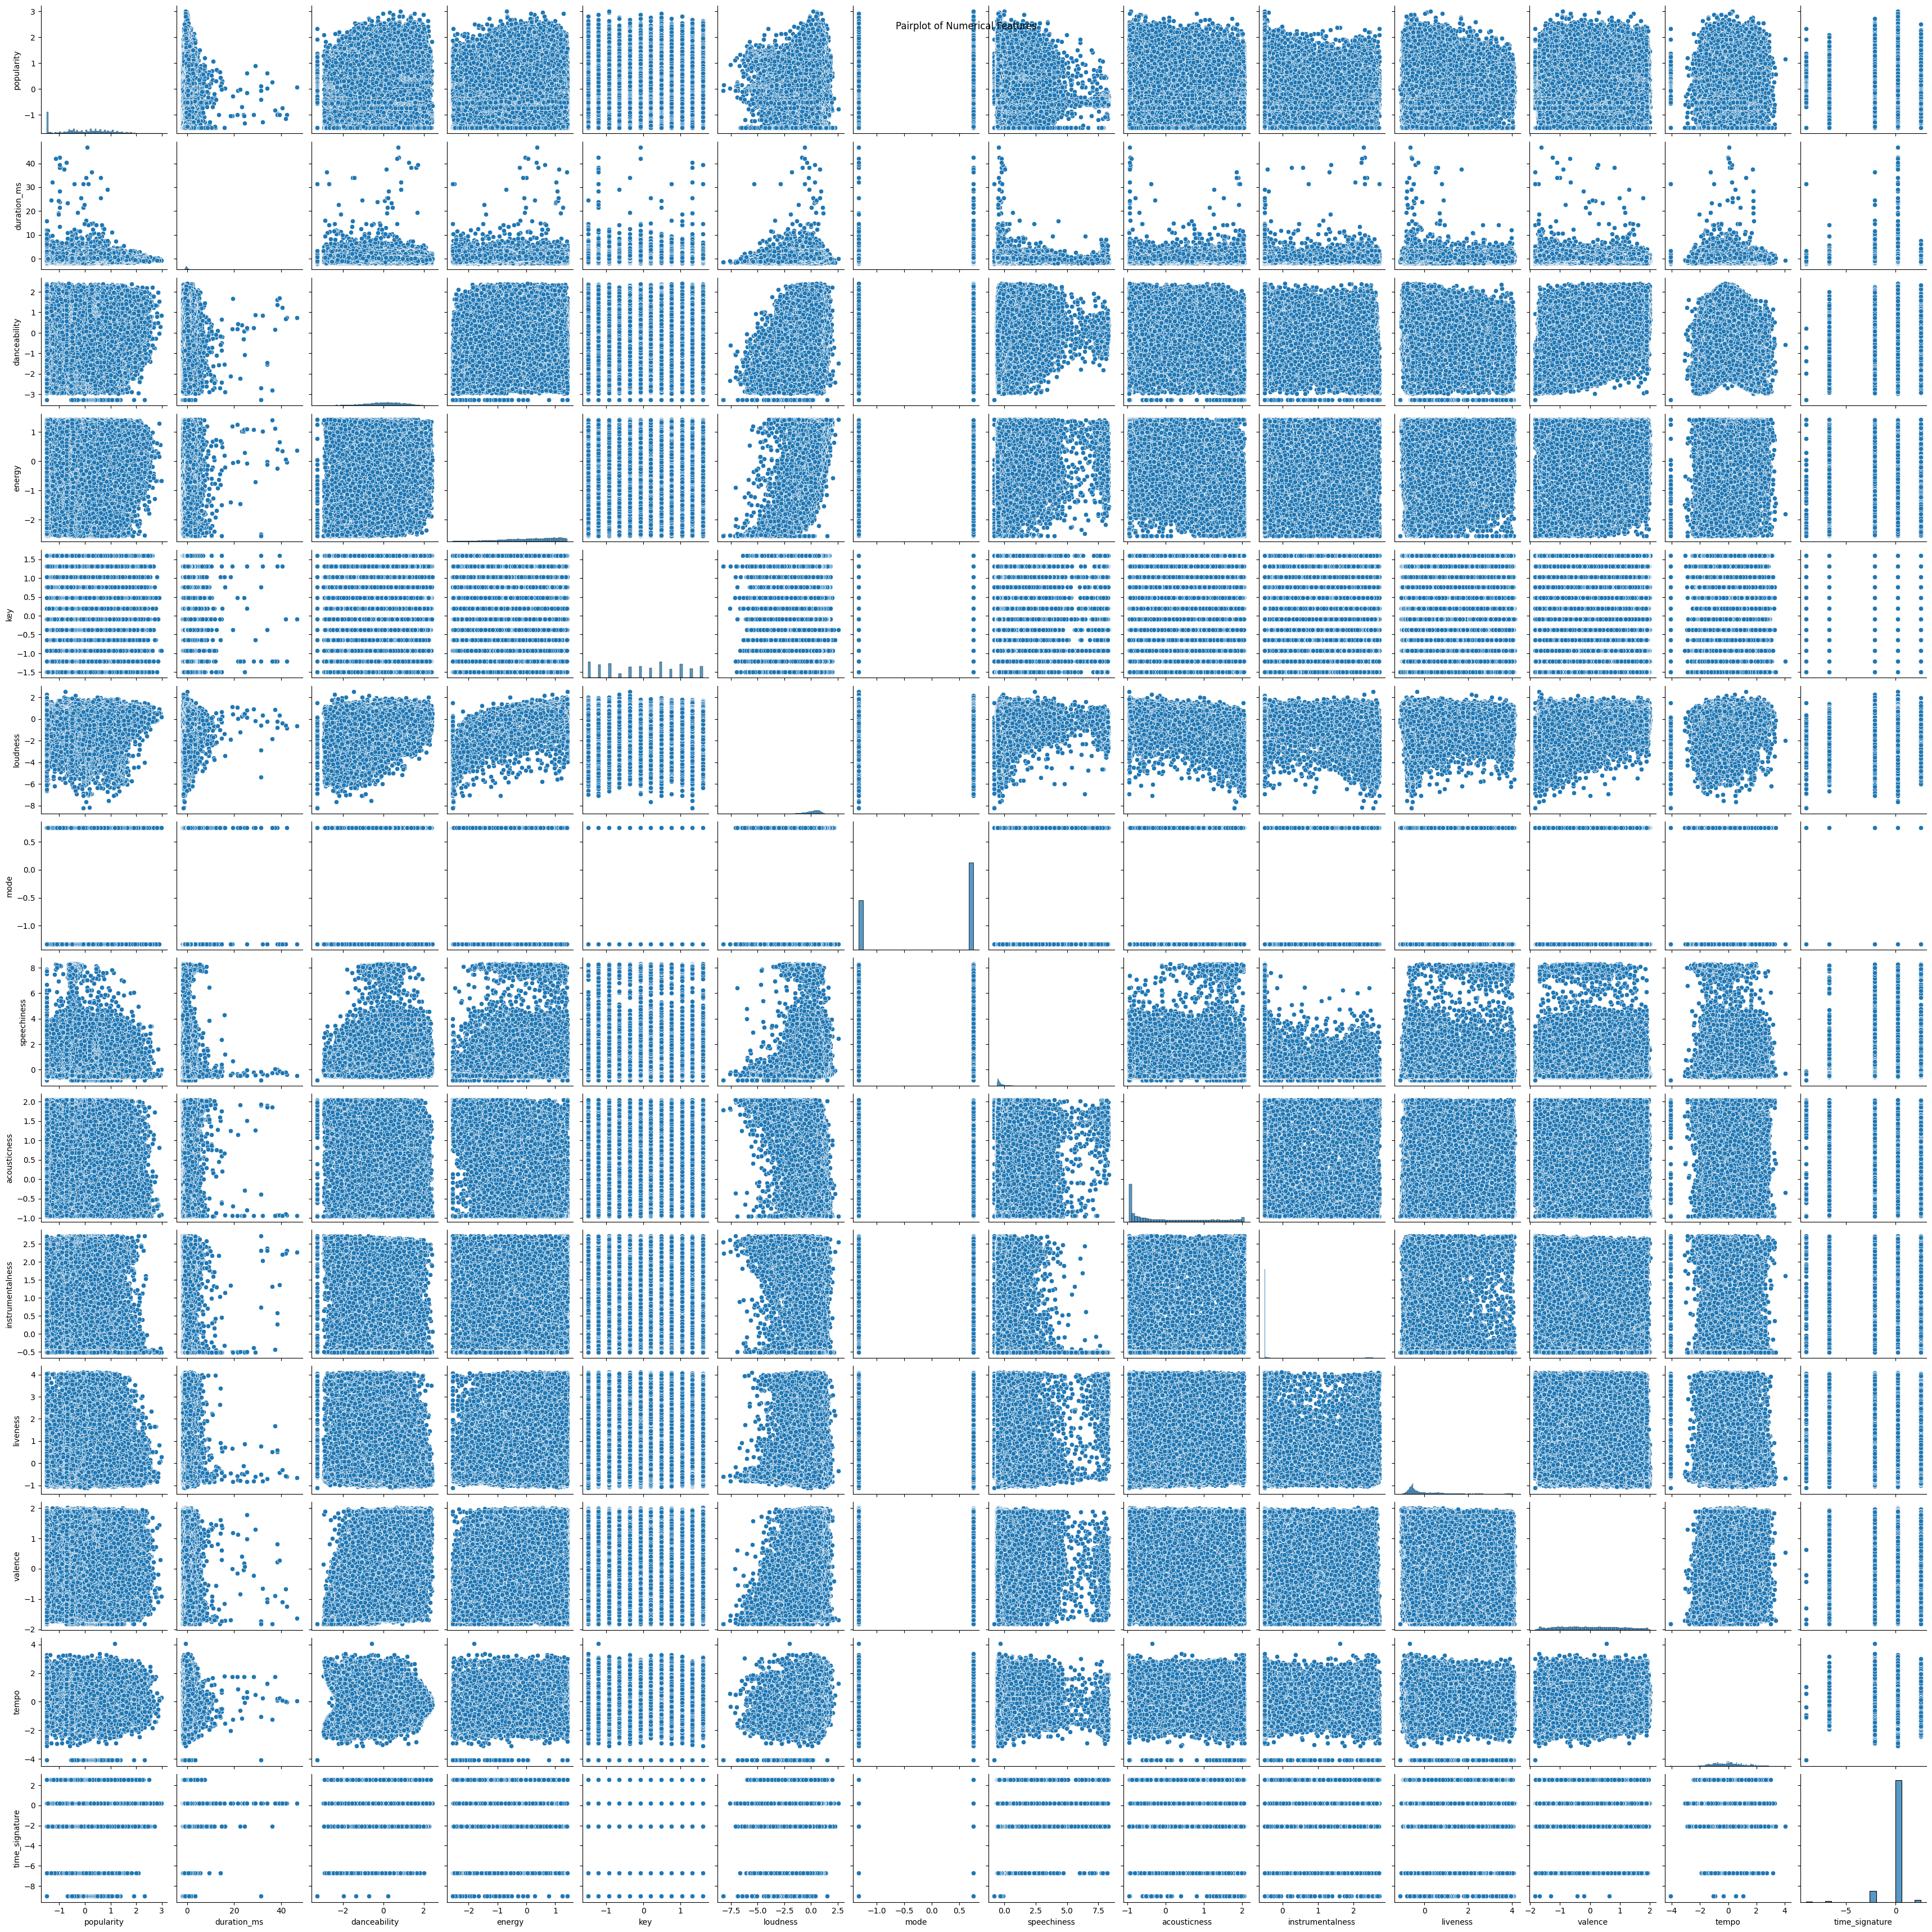

In [24]:

# Pairplot for visualizing relationships between numerical features
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Features')
plt.show()

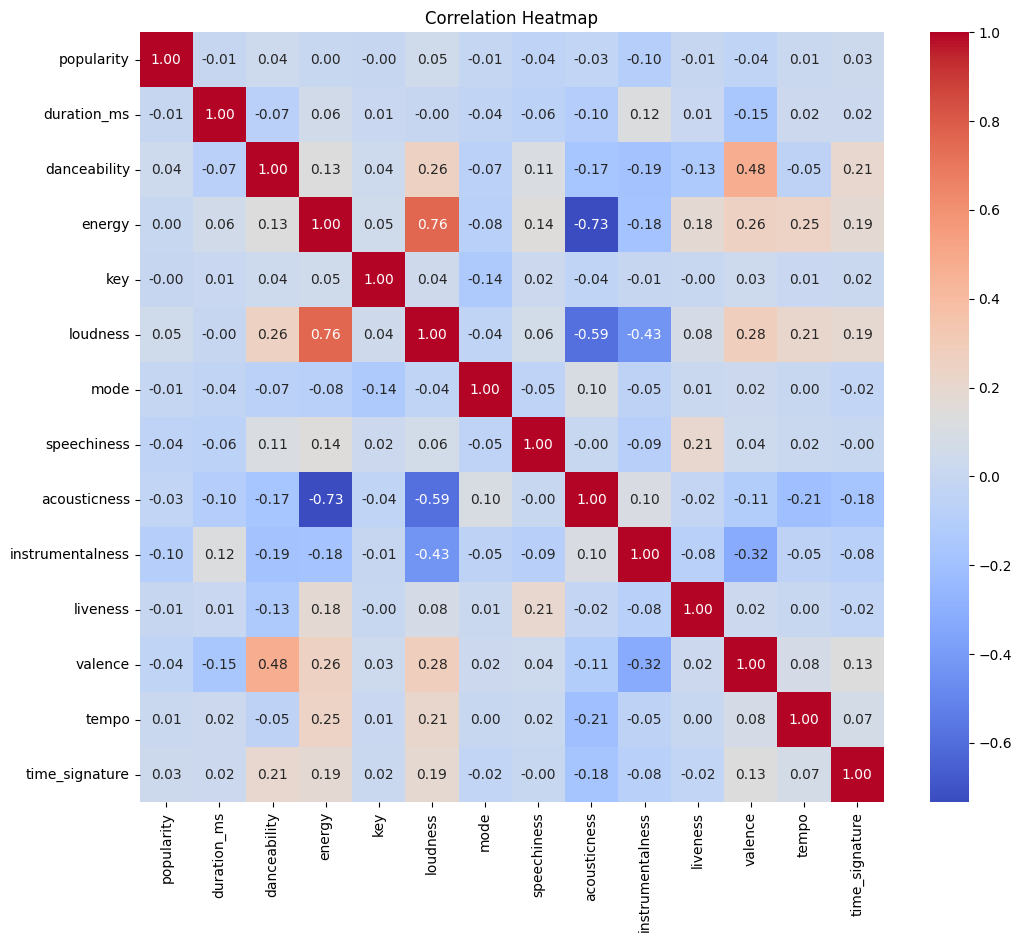

In [26]:
# Correlation heatmap 
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


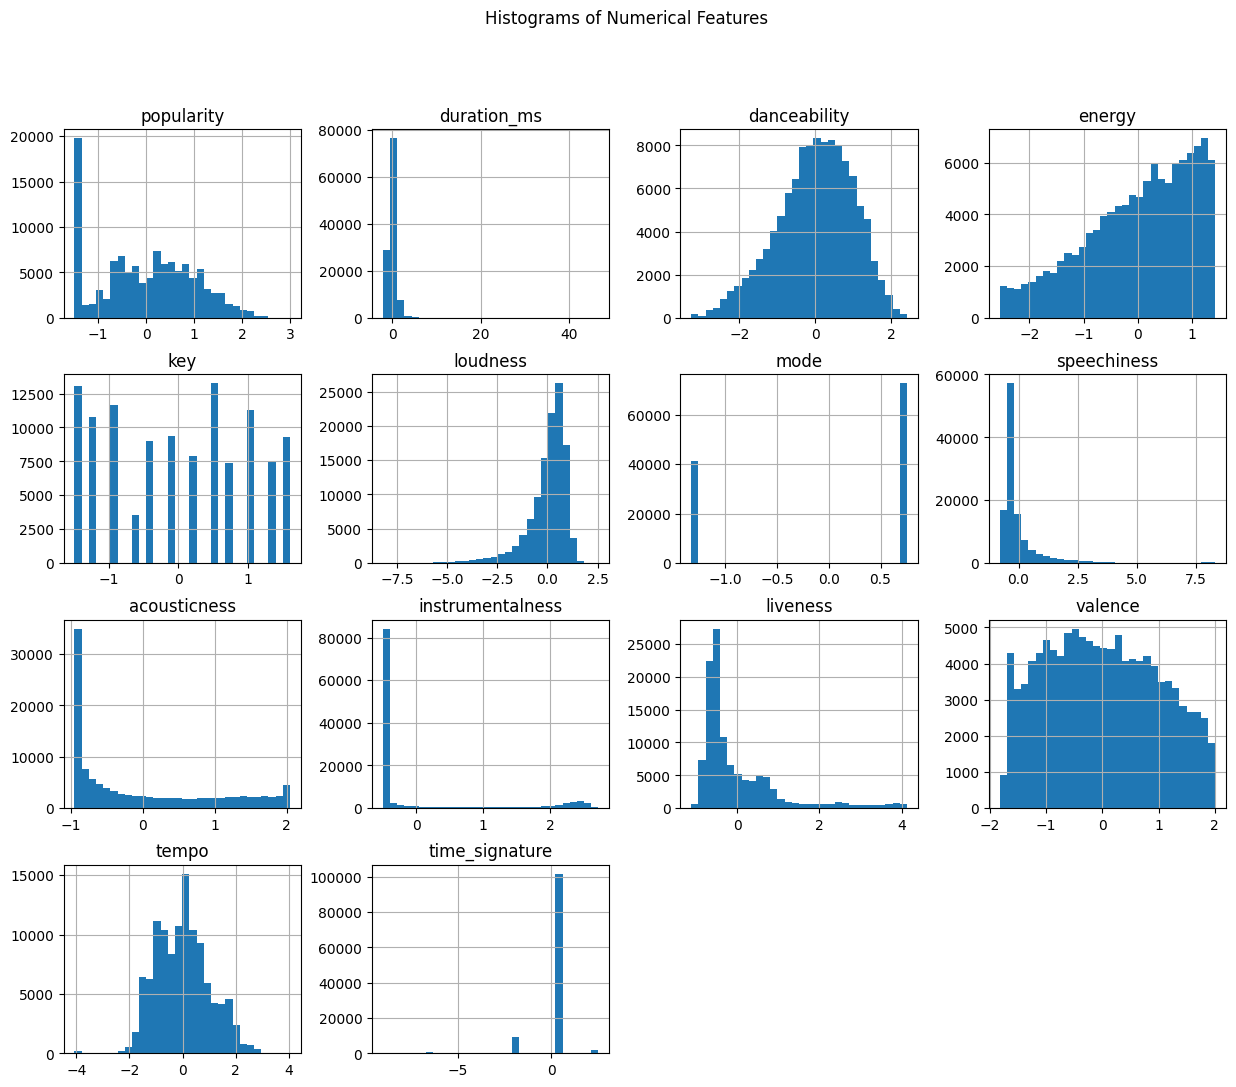

In [27]:
#Hstogram for distribution of numerics
df[numerical_columns].hist(figsize=(15, 12), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

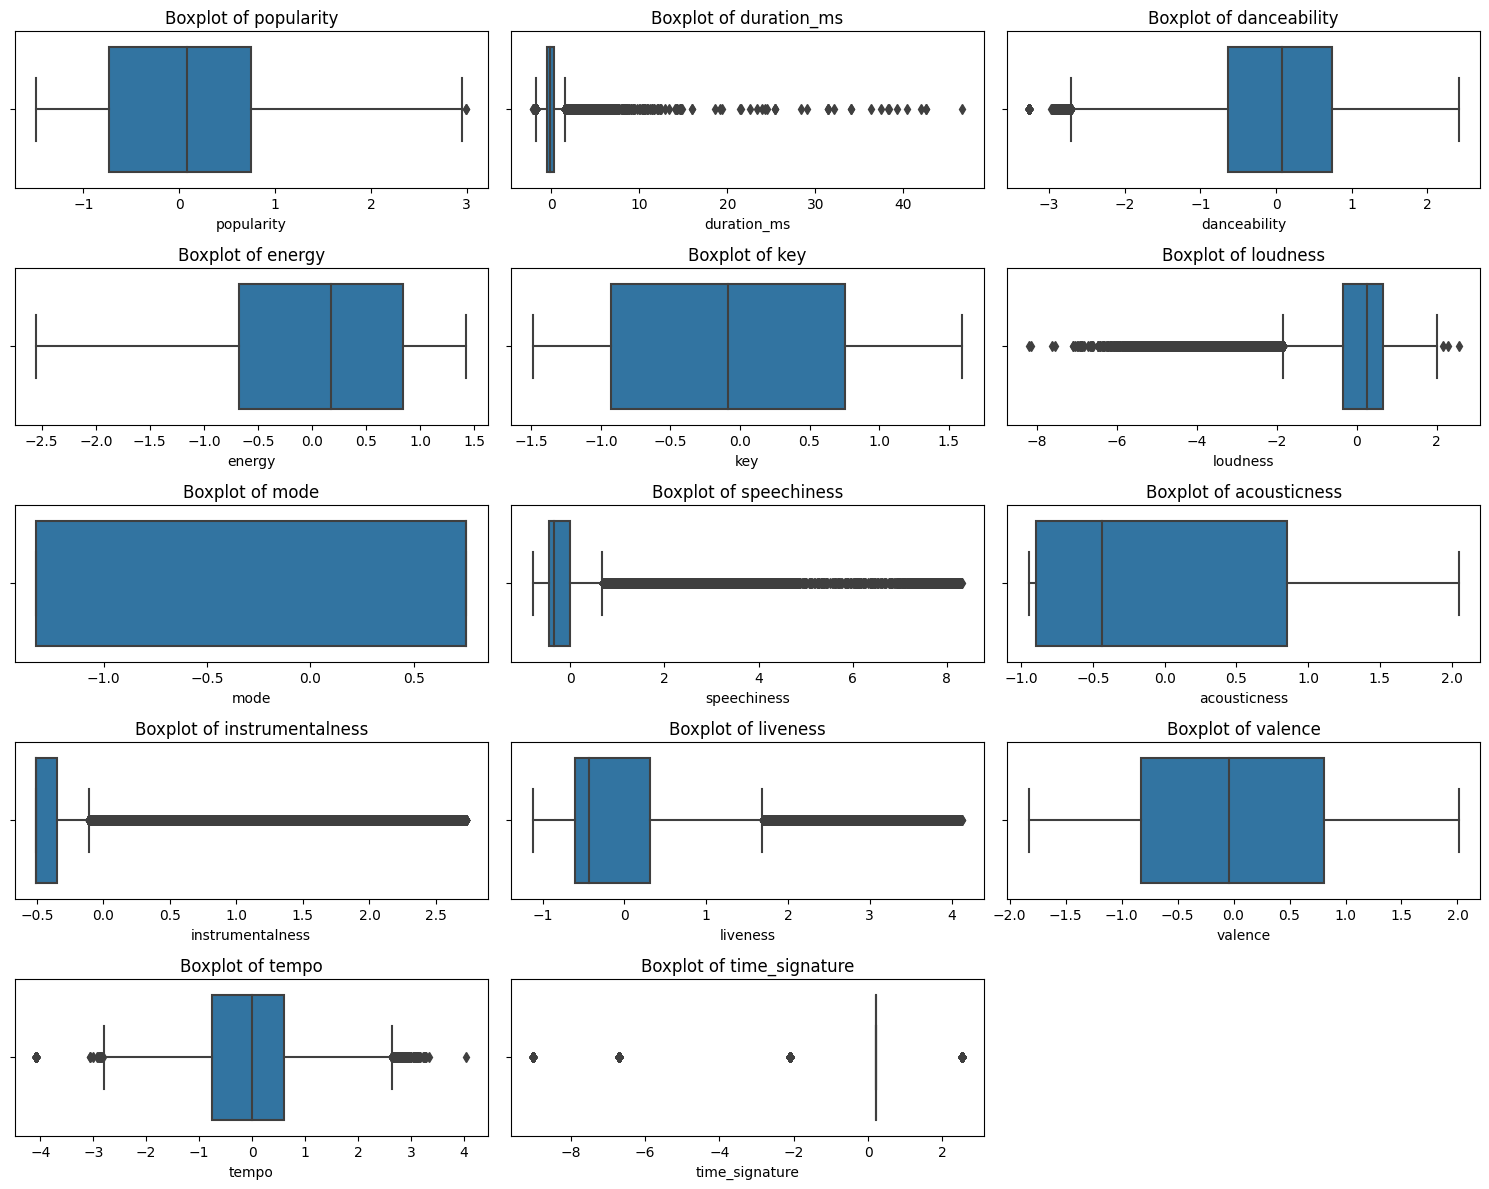

In [30]:
# IDENTIFYING outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

In [32]:
#Preparing data for Modle training
X = df.drop(columns=['track_id'])  
y = df['track_genre']  # Target variable

print("\nData preparation is complete. The dataset is all set for model training.")


Data preparation is complete. The dataset is now ready for model training.
